# Titanic Servival prediction

In [14]:
#importing laibries

import pandas as pd
import numpy as np

In [15]:
#load the dataset.

df=pd.read_csv('titanic_train.csv')
#explore the dataset
print (df.head())# print 1st few rows
print(df.info())#info about dataset

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

In [16]:
#handle the missing data
df.fillna(0, inplace=True)


In [17]:
#feature engineering
df['FamilySize']=df['SibSp']+df['Parch']+1
df['IsAlone']=df['FamilySize'].apply(lambda x: 1 if x ==1 else 0)

In [18]:
print(df.groupby('Survived').mean())
print(df.groupby('Pclass').mean())

          PassengerId    Pclass        Age     SibSp     Parch       Fare  \
Survived                                                                    
0          447.016393  2.531876  23.653005  0.553734  0.329690  22.117887   
1          444.368421  1.950292  24.034123  0.473684  0.464912  48.395408   

          FamilySize   IsAlone  
Survived                        
0           1.883424  0.681239  
1           1.938596  0.476608  
        PassengerId  Survived        Age     SibSp     Parch       Fare  \
Pclass                                                                    
1        461.597222  0.629630  32.923241  0.416667  0.356481  84.154687   
2        445.956522  0.472826  28.091467  0.402174  0.380435  20.662183   
3        439.154786  0.242363  18.177026  0.615071  0.393075  13.675550   

        FamilySize   IsAlone  
Pclass                        
1         1.773148  0.504630  
2         1.782609  0.565217  
3         2.008147  0.659878  


C:\Users\admin\AppData\Local\Temp\ipykernel_7720\1128131673.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Survived').mean())
C:\Users\admin\AppData\Local\Temp\ipykernel_7720\1128131673.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  print(df.groupby('Pclass').mean())


In [19]:
#prepare the data for modeling
x = df.drop(['PassengerId','Name','Survived'], axis=1)
y = df['Survived']

In [20]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Visualization using Matplotlib and Seaborn packages.

In [21]:
import matplotlib.pyplot as plt # Plot the graphes
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

Bar Chart for Categorical Features
Pclass

Sex

SibSp ( # of siblings and spouse)

Parch ( # of parents and children)

Embarked

Cabin

In [22]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

Survived :
 female    233
male      109
Name: Sex, dtype: int64
Dead:
 male      468
female     81
Name: Sex, dtype: int64


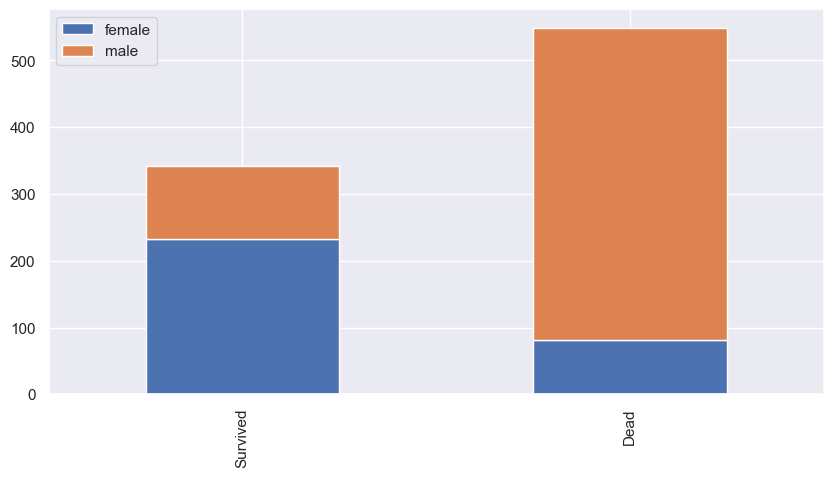

In [23]:
bar_chart('Sex')
print("Survived :\n",train[train['Survived']==1]['Sex'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Sex'].value_counts())

Survived :
 1    136
3    119
2     87
Name: Pclass, dtype: int64
Dead:
 3    372
2     97
1     80
Name: Pclass, dtype: int64


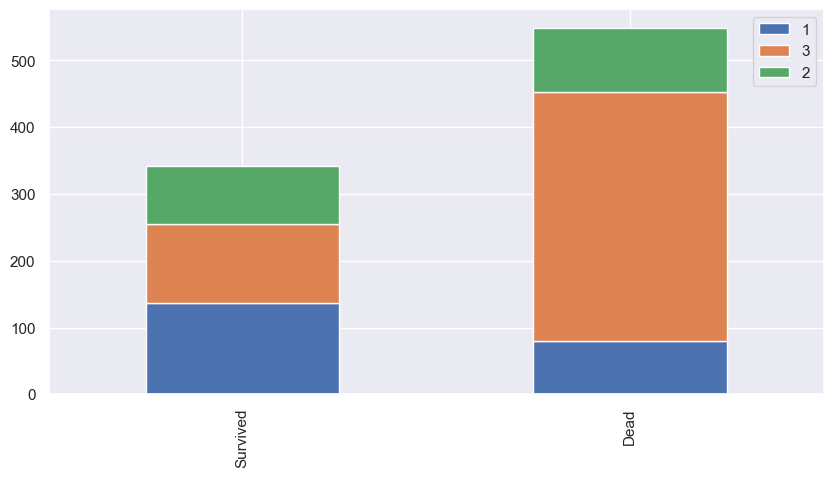

In [24]:
bar_chart('Pclass')
print("Survived :\n",train[train['Survived']==1]['Pclass'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Pclass'].value_counts())

Survived :
 0    210
1    112
2     13
3      4
4      3
Name: SibSp, dtype: int64
Dead:
 0    398
1     97
4     15
2     15
3     12
8      7
5      5
Name: SibSp, dtype: int64


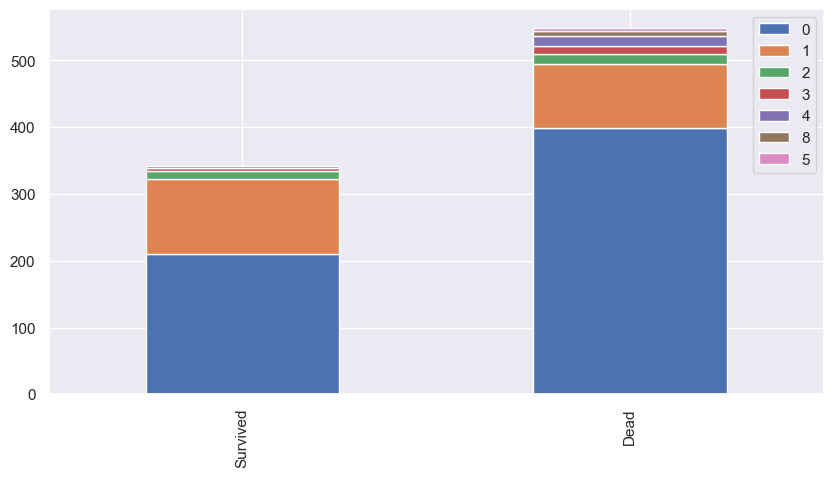

In [25]:
bar_chart('SibSp')
print("Survived :\n",train[train['Survived']==1]['SibSp'].value_counts())
print("Dead:\n",train[train['Survived']==0]['SibSp'].value_counts())

The Chart confirms a person aboarded with more than 2 siblings or spouse more likely survived.
The Chart confirms a person aboarded without siblings or spouse more likely dead

Survived :
 0    233
1     65
2     40
3      3
5      1
Name: Parch, dtype: int64
Dead:
 0    445
1     53
2     40
5      4
4      4
3      2
6      1
Name: Parch, dtype: int64


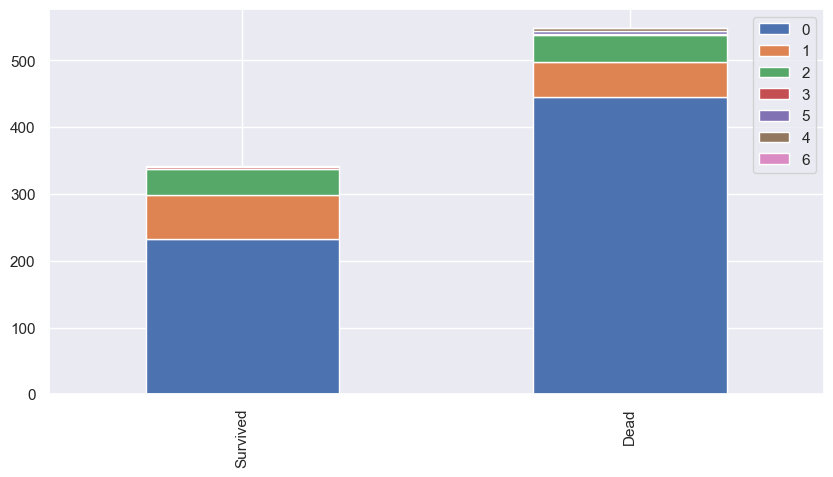

In [26]:
bar_chart('Parch')
print("Survived :\n",train[train['Survived']==1]['Parch'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Parch'].value_counts())

The Chart confirms a person aboarded with more than 2 parents or children more likely survived.
The Chart confirms a person aboarded alone more likely dead

Survived :
 S    217
C     93
Q     30
Name: Embarked, dtype: int64
Dead:
 S    427
C     75
Q     47
Name: Embarked, dtype: int64


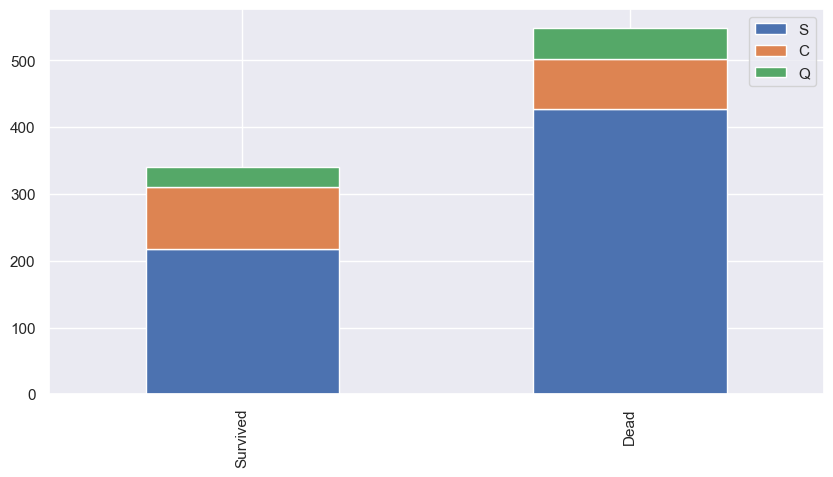

In [27]:
bar_chart('Embarked')
print("Survived :\n",train[train['Survived']==1]['Embarked'].value_counts())
print("Dead:\n",train[train['Survived']==0]['Embarked'].value_counts())

The Chart confirms a person aboarded from C slightly more likely survived.
The Chart confirms a person aboarded from Q more likely dead.
The Chart confirms a person aboarded from S more likely dead.

# 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data to create features (feature vectors) that make machine learning algorithms work.

feature vector is an n-dimensional vector of numerical features that represent some object. Many algorithms in machine learning require a numerical representation of objects, since such representations facilitate processing and statistical analysis.

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [30]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)

In [31]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


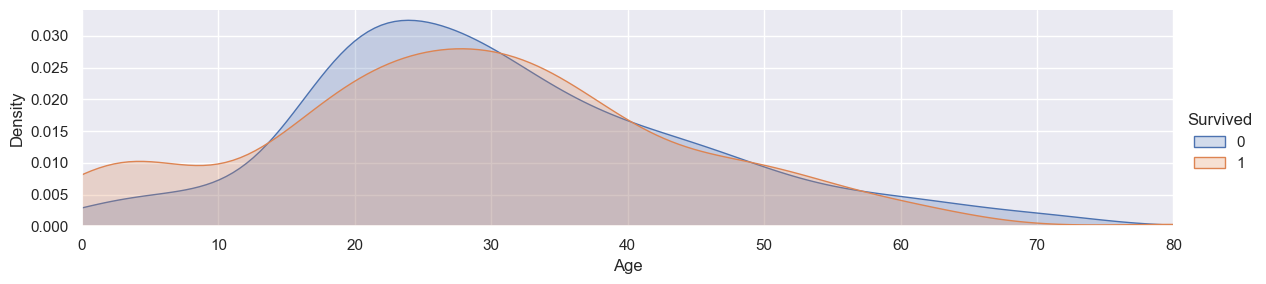

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(10.0, 50.0)

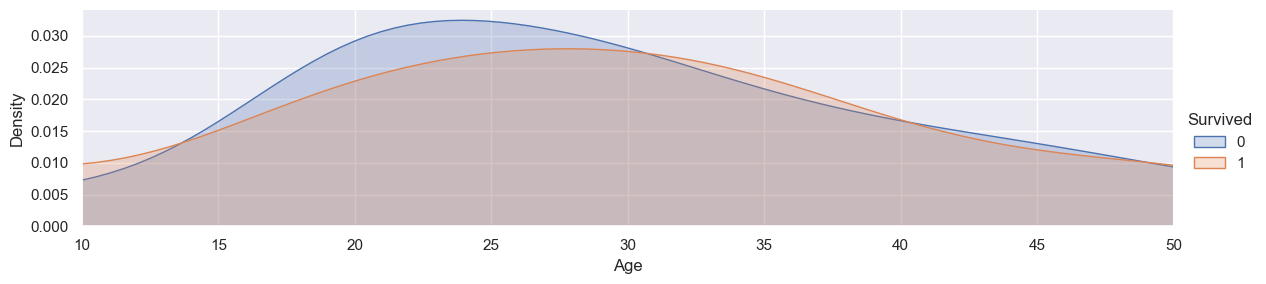

In [32]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.show()

facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend() 
plt.xlim(10,50)

In [33]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


Binning

Binning/Converting Numerical Age to Categorical Variable

feature vector map:

child: 0
young: 1
adult: 2
mid-age: 3
senior: 4

In [34]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


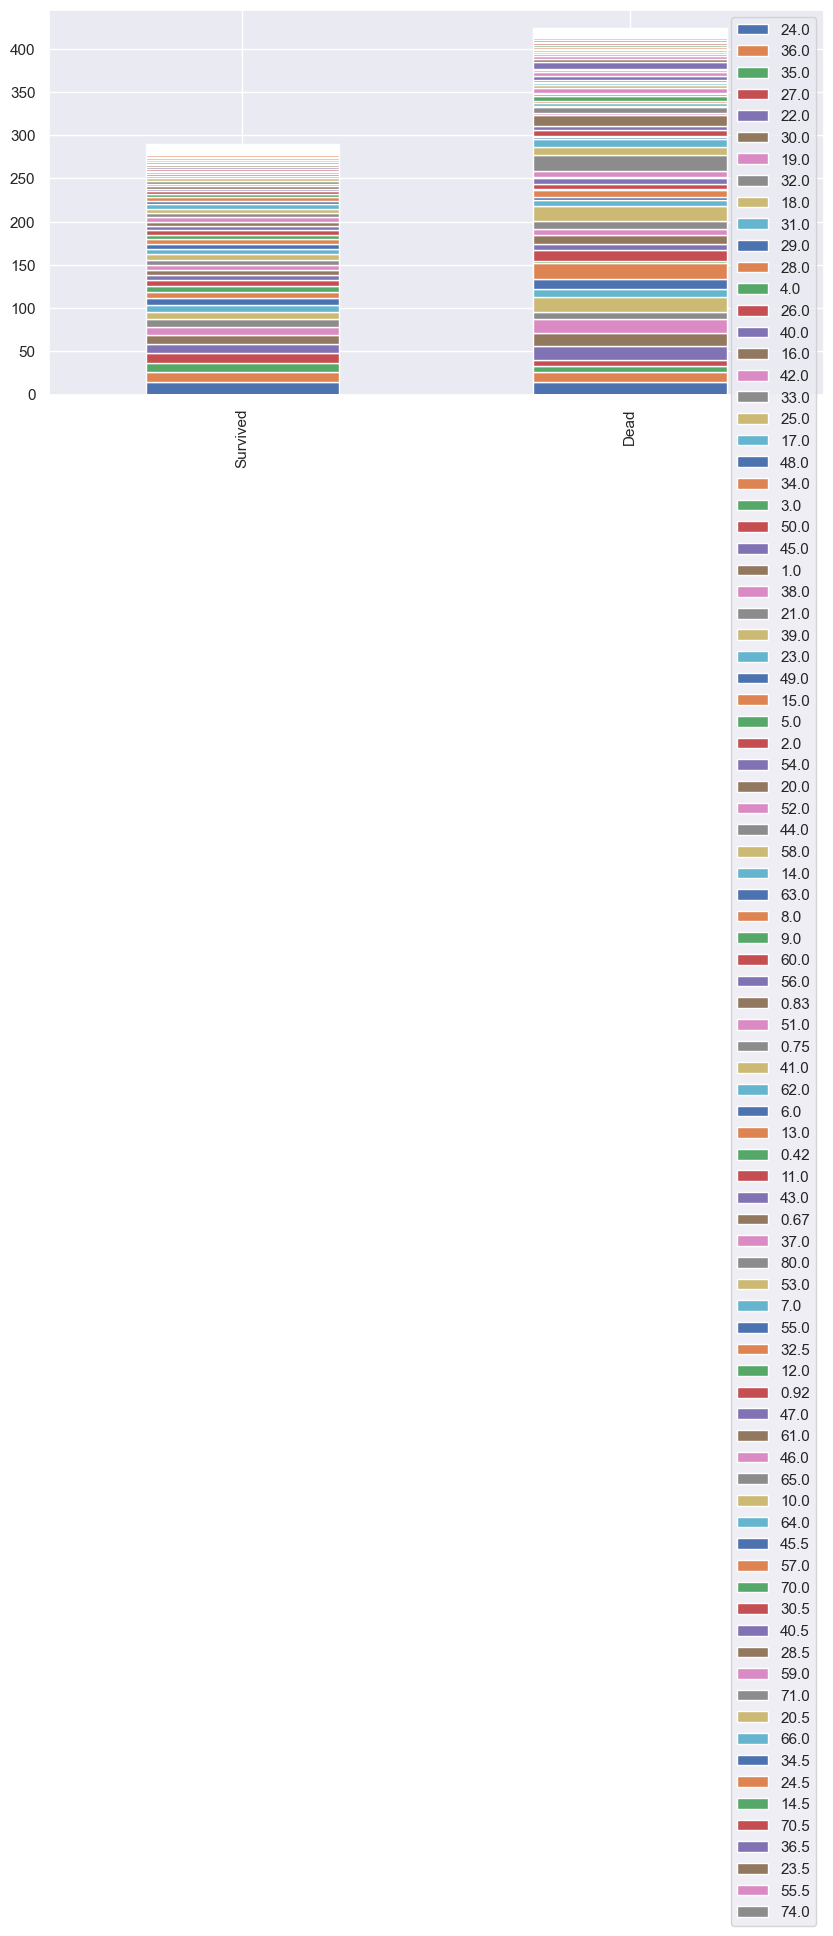

In [35]:
train.head()
bar_chart('Age')

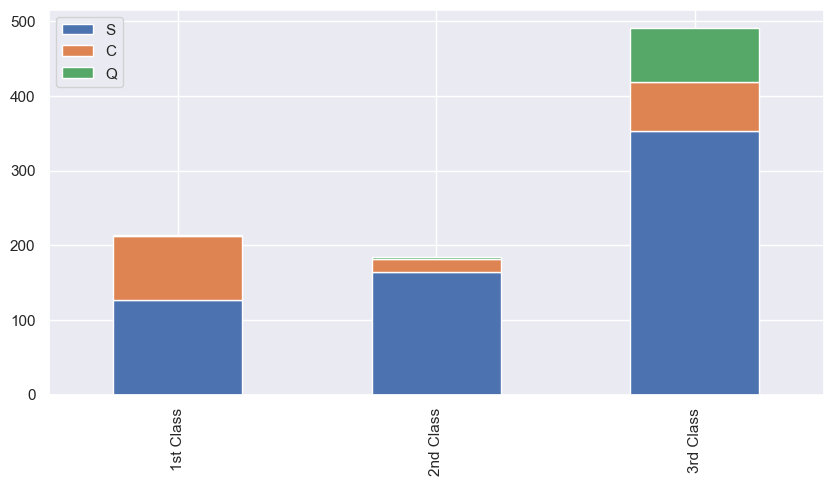

Pclass1:
 S    127
C     85
Q      2
Name: Embarked, dtype: int64
Pclass2:
 S    164
C     17
Q      3
Name: Embarked, dtype: int64
Pclass3:
 S    353
Q     72
C     66
Name: Embarked, dtype: int64


In [36]:
Pclass1 = train[train['Pclass'] == 1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass'] == 2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass'] == 3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1,Pclass2,Pclass3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind = 'bar', stacked =  True, figsize=(10,5))
plt.show()
print("Pclass1:\n",Pclass1)
print("Pclass2:\n",Pclass2)
print("Pclass3:\n",Pclass3)


more than 50 % of 1st class are from S embark.
more than 50 % of 2st class are from S embark.
more than 50 % of 3st class are from S embark.

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
embarked_mapping = {'S':0,'C':1,'Q':2}
for dataset in train:
    train['Embarked'] = train['Embarked'].map(embarked_mapping)

In [39]:
# train["Fare"].fillna(train.groupby("Pclass")["Fare"])
# train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace = True)
# train.head(50)




train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(50)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,NaN
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,NaN
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,NaN
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,NaN
5,6,0,3,male,NaN,0,0,330877,8.4583,NaN,NaN
6,7,0,1,male,54.0,0,0,17463,51.8625,E46,NaN
7,8,0,3,male,2.0,3,1,349909,21.0750,NaN,NaN
8,9,1,3,female,27.0,0,2,347742,11.1333,NaN,NaN
9,10,1,2,female,14.0,1,0,237736,30.0708,NaN,NaN


C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


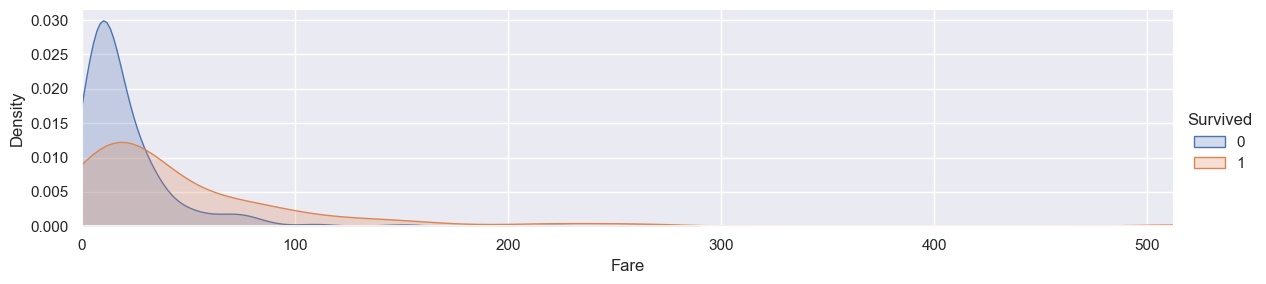

In [40]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4 )
facet.map(sns.kdeplot, 'Fare', shade = True)
facet.set(xlim = (0, train['Fare'].max()))
facet.add_legend()
plt.show()

C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\axisgrid.py:848: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


(0.0, 20.0)

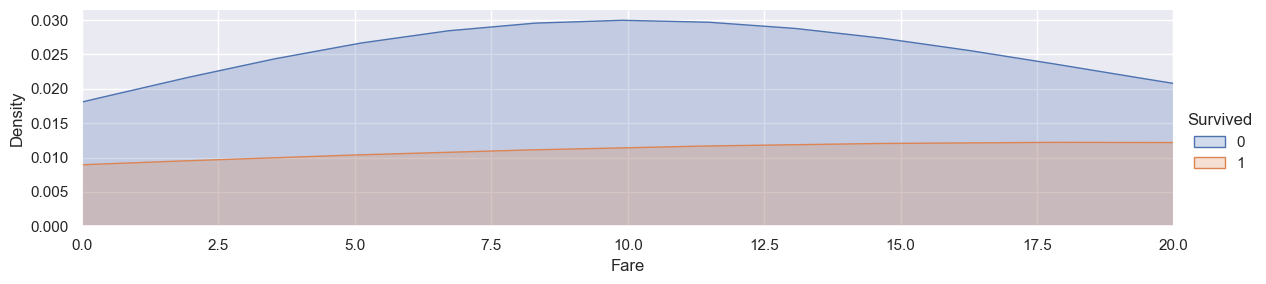

In [41]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.xlim(0, 20)

In [42]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

<Axes: >

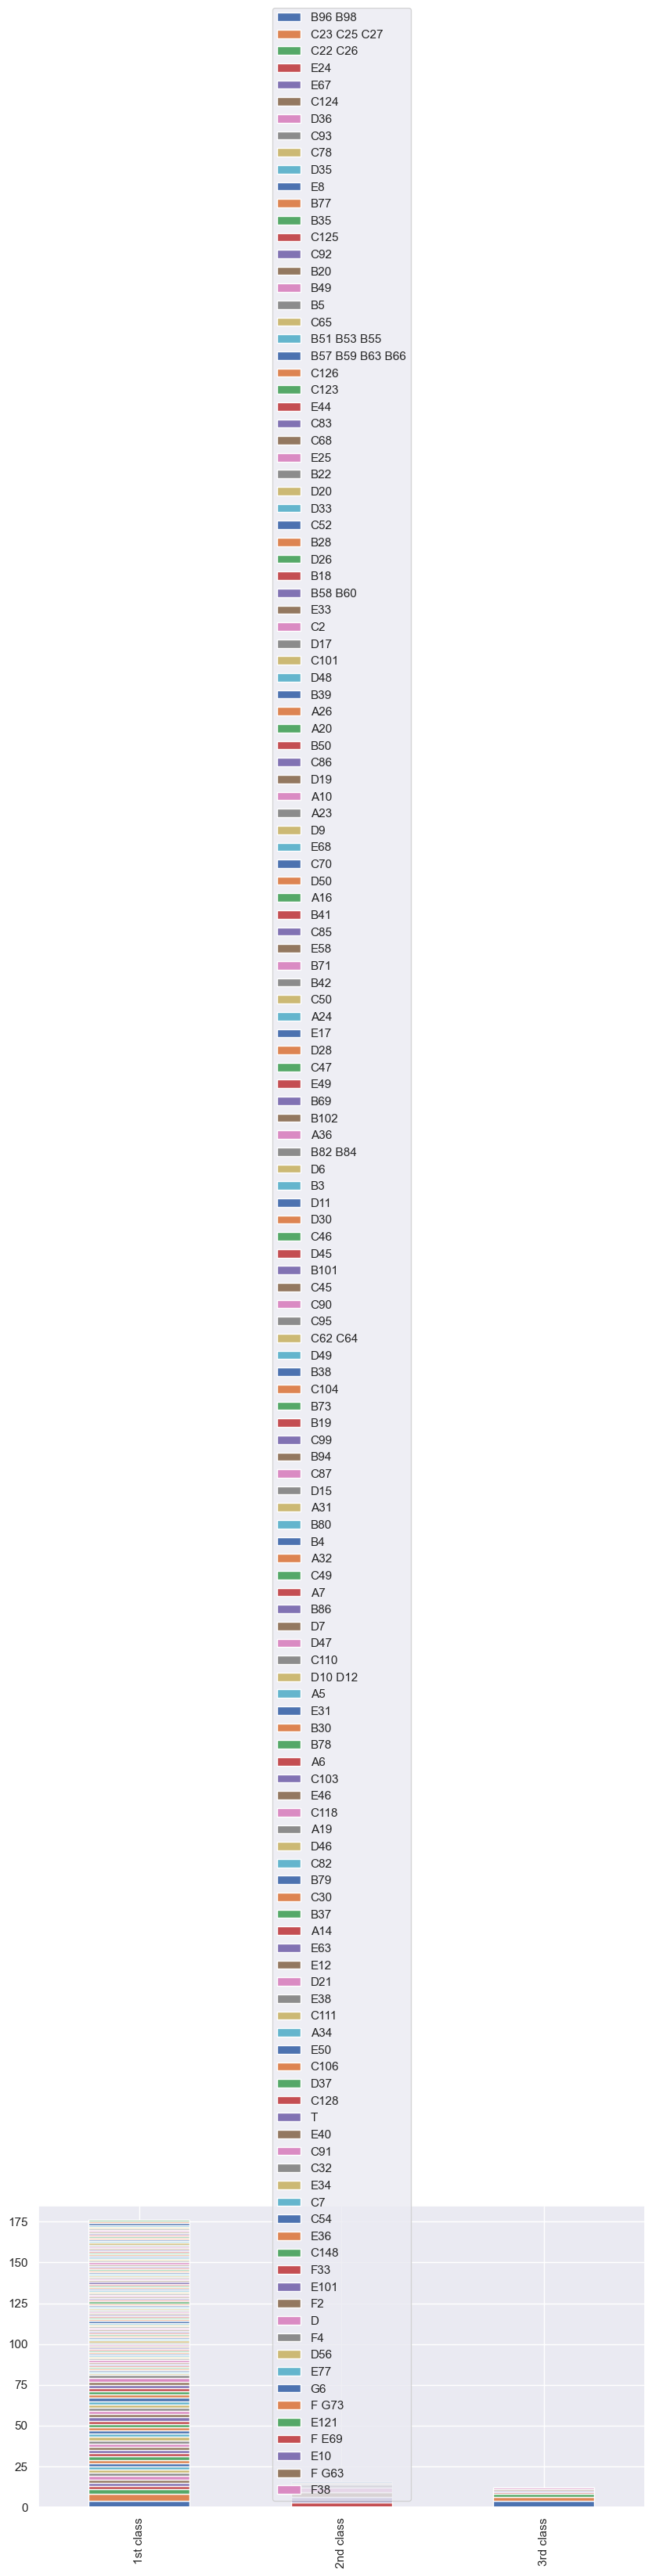

In [43]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))